## Hibernet
By Gloria Dong, Helena He, Shaohui Lang, Ria Luo, and Sanjay Natesan

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df = pd.read_csv('data/sleep_cycle_productivity.csv')
df

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


### Initial Data Exploration

In [55]:
print("\nBasic information about the dataset:")
df.info()

print("\nStatistical summary of numerical columns:")
print(df.describe())

print("\nCheck for missing values:")
print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = zscore(df[numerical_cols])

# Check for outliers: Absolute Z-score greater than 3
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = outliers.any(axis=1)  # Find rows with outliers in any column

print("Outliers: ", df[outlier_indices])


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivi

### Exploratory Data Analysis

Text(0.5, 1.0, 'Productivity Score by Gender')

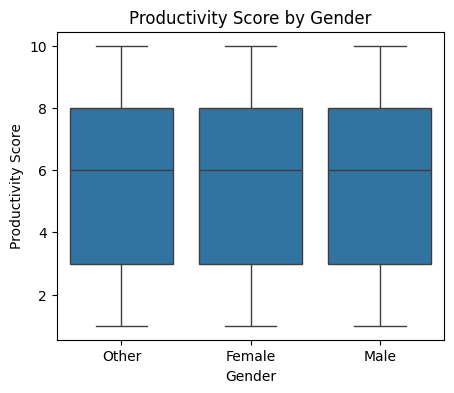

In [56]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Gender',y = 'Productivity Score')
plt.title('Productivity Score by Gender')

In [57]:
def age_group(age):
  if age>=18 and age<= 22:
      return '18-22'
  elif age>22 and age < 30:
      return  '22-29'
  elif age>=30 and age < 40:
      return  '30-39'
  elif age>=40 and age < 50:
      return  '40-49'
  elif age>=50 and age < 60:
      return  '50-59'
df['Age Groups'] = df['Age'].apply(age_group)
df['Age Groups'].head(5)

0    30-39
1    40-49
2    18-22
3    30-39
4    40-49
Name: Age Groups, dtype: object

Text(0.5, 1.0, 'Productivity Score by Age Group')

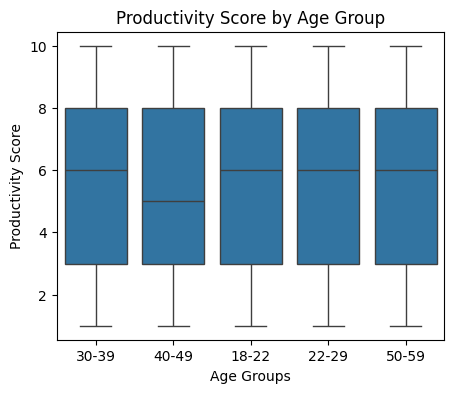

In [58]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Age Groups',y = 'Productivity Score')
plt.title('Productivity Score by Age Group')

In [59]:
def sleep_group(hours):
    if hours < 4:
        return '<4 hours'
    elif 4 <= hours < 6:
        return '4-6 hours'
    elif 6 <= hours < 8:
        return '6-8 hours'
    else:
        return '8+ hours'
df['Sleep Groups'] = df['Total Sleep Hours'].apply(sleep_group)
df['Sleep Groups'].head(5)

0    4-6 hours
1    4-6 hours
2    4-6 hours
3    6-8 hours
4    6-8 hours
Name: Sleep Groups, dtype: object

Text(0.5, 1.0, 'Productivity Score by Sleep Hours')

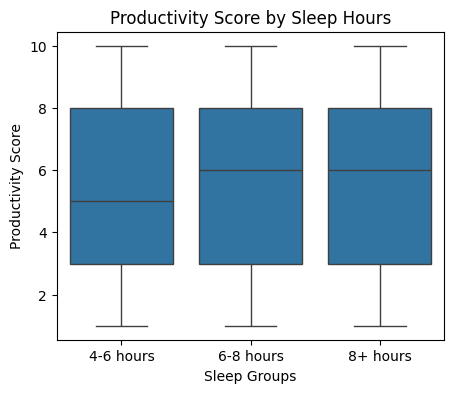

In [60]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Sleep Groups',y = 'Productivity Score')
plt.title('Productivity Score by Sleep Hours')

In [61]:
def exercise_group(minutes):
    if minutes == 0:
        return 'No exercise'
    elif minutes < 30:
        return '<30 mins'
    elif 30 <= minutes < 60:
        return '30-60 mins'
    else:
        return '60+ mins'

df['Exercise Groups'] = df['Exercise (mins/day)'].apply(exercise_group)
df['Exercise Groups'].head(5)

0      60+ mins
1    30-60 mins
2      <30 mins
3    30-60 mins
4      60+ mins
Name: Exercise Groups, dtype: object

Text(0.5, 1.0, 'Productivity Score by Exercise Groups')

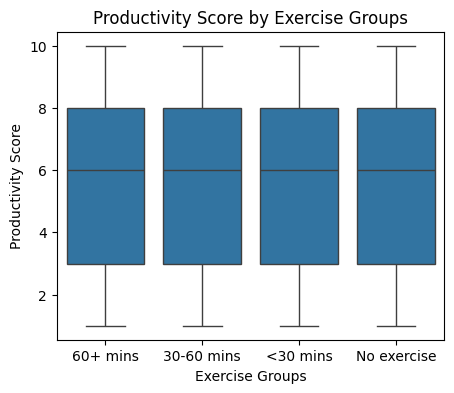

In [62]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Exercise Groups',y = 'Productivity Score')
plt.title('Productivity Score by Exercise Groups')

In [63]:
def caffeine_group(mg):
    if mg == 0:
        return 'No caffeine'
    elif mg < 100:
        return '<100 mg'
    elif 100 <= mg < 200:
        return '100-200 mg'
    elif 200 <= mg < 300:
        return '200-300 mg'
    else:
        return '300+ mg'

df['Caffeine Groups'] = df['Caffeine Intake (mg)'].apply(caffeine_group)
df['Caffeine Groups'].head(5)

0       <100 mg
1       <100 mg
2       <100 mg
3       <100 mg
4    200-300 mg
Name: Caffeine Groups, dtype: object

Text(0.5, 1.0, 'Productivity Score by Caffeine Groups')

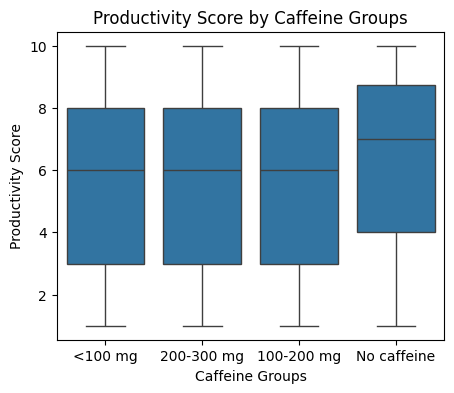

In [64]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Caffeine Groups',y = 'Productivity Score')
plt.title('Productivity Score by Caffeine Groups')

In [65]:
def work_hours_group(hours):
    if hours < 4:
        return '<4 hours'
    elif 4 <= hours < 6:
        return '4-6 hours'
    elif 6 <= hours < 8:
        return '6-8 hours'
    elif 8 <= hours < 10:
        return '8-10 hours'
    else:
        return '10+ hours'

df['Work Hours Groups'] = df['Work Hours (hrs/day)'].apply(work_hours_group)
df['Work Hours Groups'].head(5)

0    8-10 hours
1     6-8 hours
2    8-10 hours
3     6-8 hours
4     10+ hours
Name: Work Hours Groups, dtype: object

Text(0.5, 1.0, 'Productivity Score by Work Hours Groups')

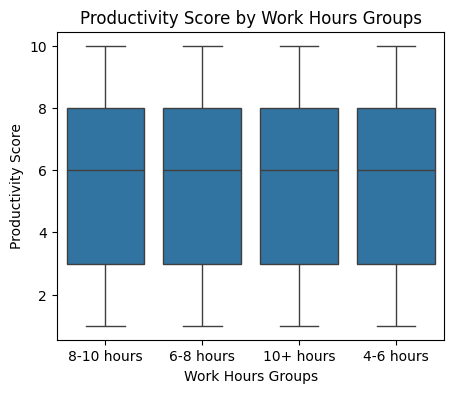

In [66]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Work Hours Groups',y = 'Productivity Score')
plt.title('Productivity Score by Work Hours Groups')

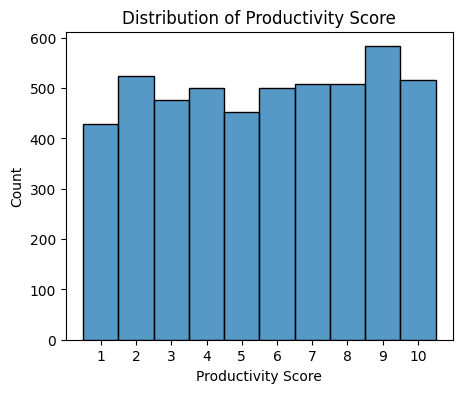

In [67]:
plt.figure(figsize=(5, 4))
sns.histplot(df['Productivity Score'],bins=range(1, 12))
plt.xticks([x + 0.5 for x in range(1, 11)], range(1, 11))
plt.title('Distribution of Productivity Score')
plt.show()

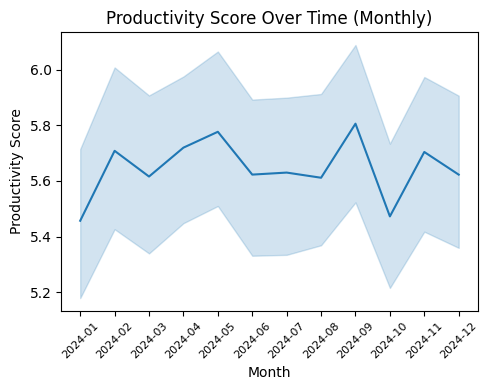

In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year-Month'] = df['Date'].dt.to_period('M').astype(str)
df = df.sort_values('Year-Month')
plt.figure(figsize=(5, 4))
sns.lineplot(data=df, x='Year-Month', y='Productivity Score')

plt.title('Productivity Score Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Productivity Score')
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.show()

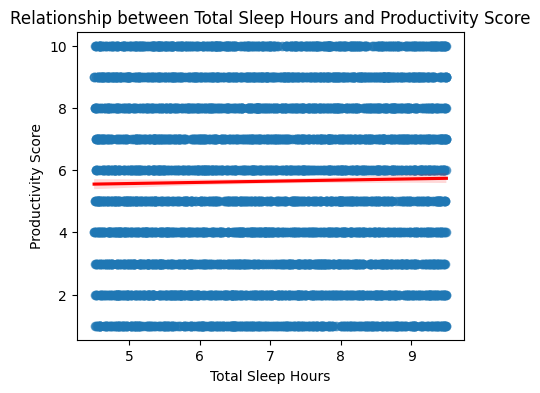

In [69]:
plt.figure(figsize=(5, 4))
sns.regplot(data=df, x='Total Sleep Hours', y='Productivity Score',
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Total Sleep Hours and Productivity Score')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Productivity Score')
plt.show()

### Cleaning and Sampling

In [70]:
df = pd.read_csv('data/sleep_cycle_productivity.csv')
df

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


In [71]:
X = df.drop('Productivity Score', axis=1)
y = df['Productivity Score']

In [72]:
# Drop the 'Person_ID' column
X.drop('Person_ID', axis=1, inplace=True)

# Extract only the hour component from the columns 'Sleep Start Time' and 'Sleep End Time'
X['Sleep Start Time Hour'] = X['Sleep Start Time'].astype(float).astype(int)
X['Sleep End Time Hour'] = X['Sleep End Time'].astype(float).astype(int)
X.drop(columns=['Sleep Start Time', 'Sleep End Time'], axis=1, inplace=True)

X

,Date,Age,Gender,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Mood Score,Stress Level,Sleep Start Time Hour,Sleep End Time Hour
0,2024-04-12,32,Other,5.28,3,86,87,116,8.808920,3,6,23,4
1,2024-11-04,41,Female,5.41,5,32,21,88,6.329833,3,7,21,2
2,2024-08-31,20,Male,5.35,7,17,88,59,8.506306,9,10,22,3
3,2024-02-22,37,Other,7.55,8,46,34,80,6.070240,4,2,23,6
4,2024-02-23,46,Other,6.75,10,61,269,94,11.374994,7,9,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,38,Female,5.37,1,55,216,96,9.384504,2,1,22,4
4996,2024-06-02,55,Male,7.91,4,70,81,177,5.016193,6,2,21,5
4997,2024-08-13,44,Female,4.80,6,21,90,139,11.788651,7,1,22,2
4998,2024-12-26,55,Other,8.40,9,15,87,161,7.093145,1,6,23,7


In [73]:
# Create new column for the month and the day of the week
X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')
X['Month'] = X['Date'].dt.month_name()
X['Day of Week'] = X['Date'].dt.day_name()
X.drop('Date', axis=1, inplace=True)
X

,Age,Gender,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Mood Score,Stress Level,Sleep Start Time Hour,Sleep End Time Hour,Month,Day of Week
0,32,Other,5.28,3,86,87,116,8.808920,3,6,23,4,April,Friday
1,41,Female,5.41,5,32,21,88,6.329833,3,7,21,2,November,Monday
2,20,Male,5.35,7,17,88,59,8.506306,9,10,22,3,August,Saturday
3,37,Other,7.55,8,46,34,80,6.070240,4,2,23,6,February,Thursday
4,46,Other,6.75,10,61,269,94,11.374994,7,9,21,4,February,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,Female,5.37,1,55,216,96,9.384504,2,1,22,4,January,Wednesday
4996,55,Male,7.91,4,70,81,177,5.016193,6,2,21,5,June,Sunday
4997,44,Female,4.80,6,21,90,139,11.788651,7,1,22,2,August,Tuesday
4998,55,Other,8.40,9,15,87,161,7.093145,1,6,23,7,December,Thursday


In [74]:
# Check for missing values
missing_summary = X.isnull().sum()
print("Missing values per column:")
print(missing_summary)

Missing values per column:
Age                              0
Gender                           0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Mood Score                       0
Stress Level                     0
Sleep Start Time Hour            0
Sleep End Time Hour              0
Month                            0
Day of Week                      0
dtype: int64


In [75]:
# One hot encode 'Gender', 'Day of Week', and 'Month' columns
X = pd.get_dummies(X, columns=['Gender', 'Day of Week', 'Month'])
X

,Age,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Mood Score,Stress Level,Sleep Start Time Hour,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,32,5.28,3,86,87,116,8.808920,3,6,23,...,False,False,False,False,False,False,False,False,False,False
1,41,5.41,5,32,21,88,6.329833,3,7,21,...,False,False,False,False,False,False,False,True,False,False
2,20,5.35,7,17,88,59,8.506306,9,10,22,...,False,False,False,False,False,False,False,False,False,False
3,37,7.55,8,46,34,80,6.070240,4,2,23,...,False,True,False,False,False,False,False,False,False,False
4,46,6.75,10,61,269,94,11.374994,7,9,21,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,5.37,1,55,216,96,9.384504,2,1,22,...,False,False,True,False,False,False,False,False,False,False
4996,55,7.91,4,70,81,177,5.016193,6,2,21,...,False,False,False,False,True,False,False,False,False,False
4997,44,4.80,6,21,90,139,11.788651,7,1,22,...,False,False,False,False,False,False,False,False,False,False
4998,55,8.40,9,15,87,161,7.093145,1,6,23,...,True,False,False,False,False,False,False,False,False,False


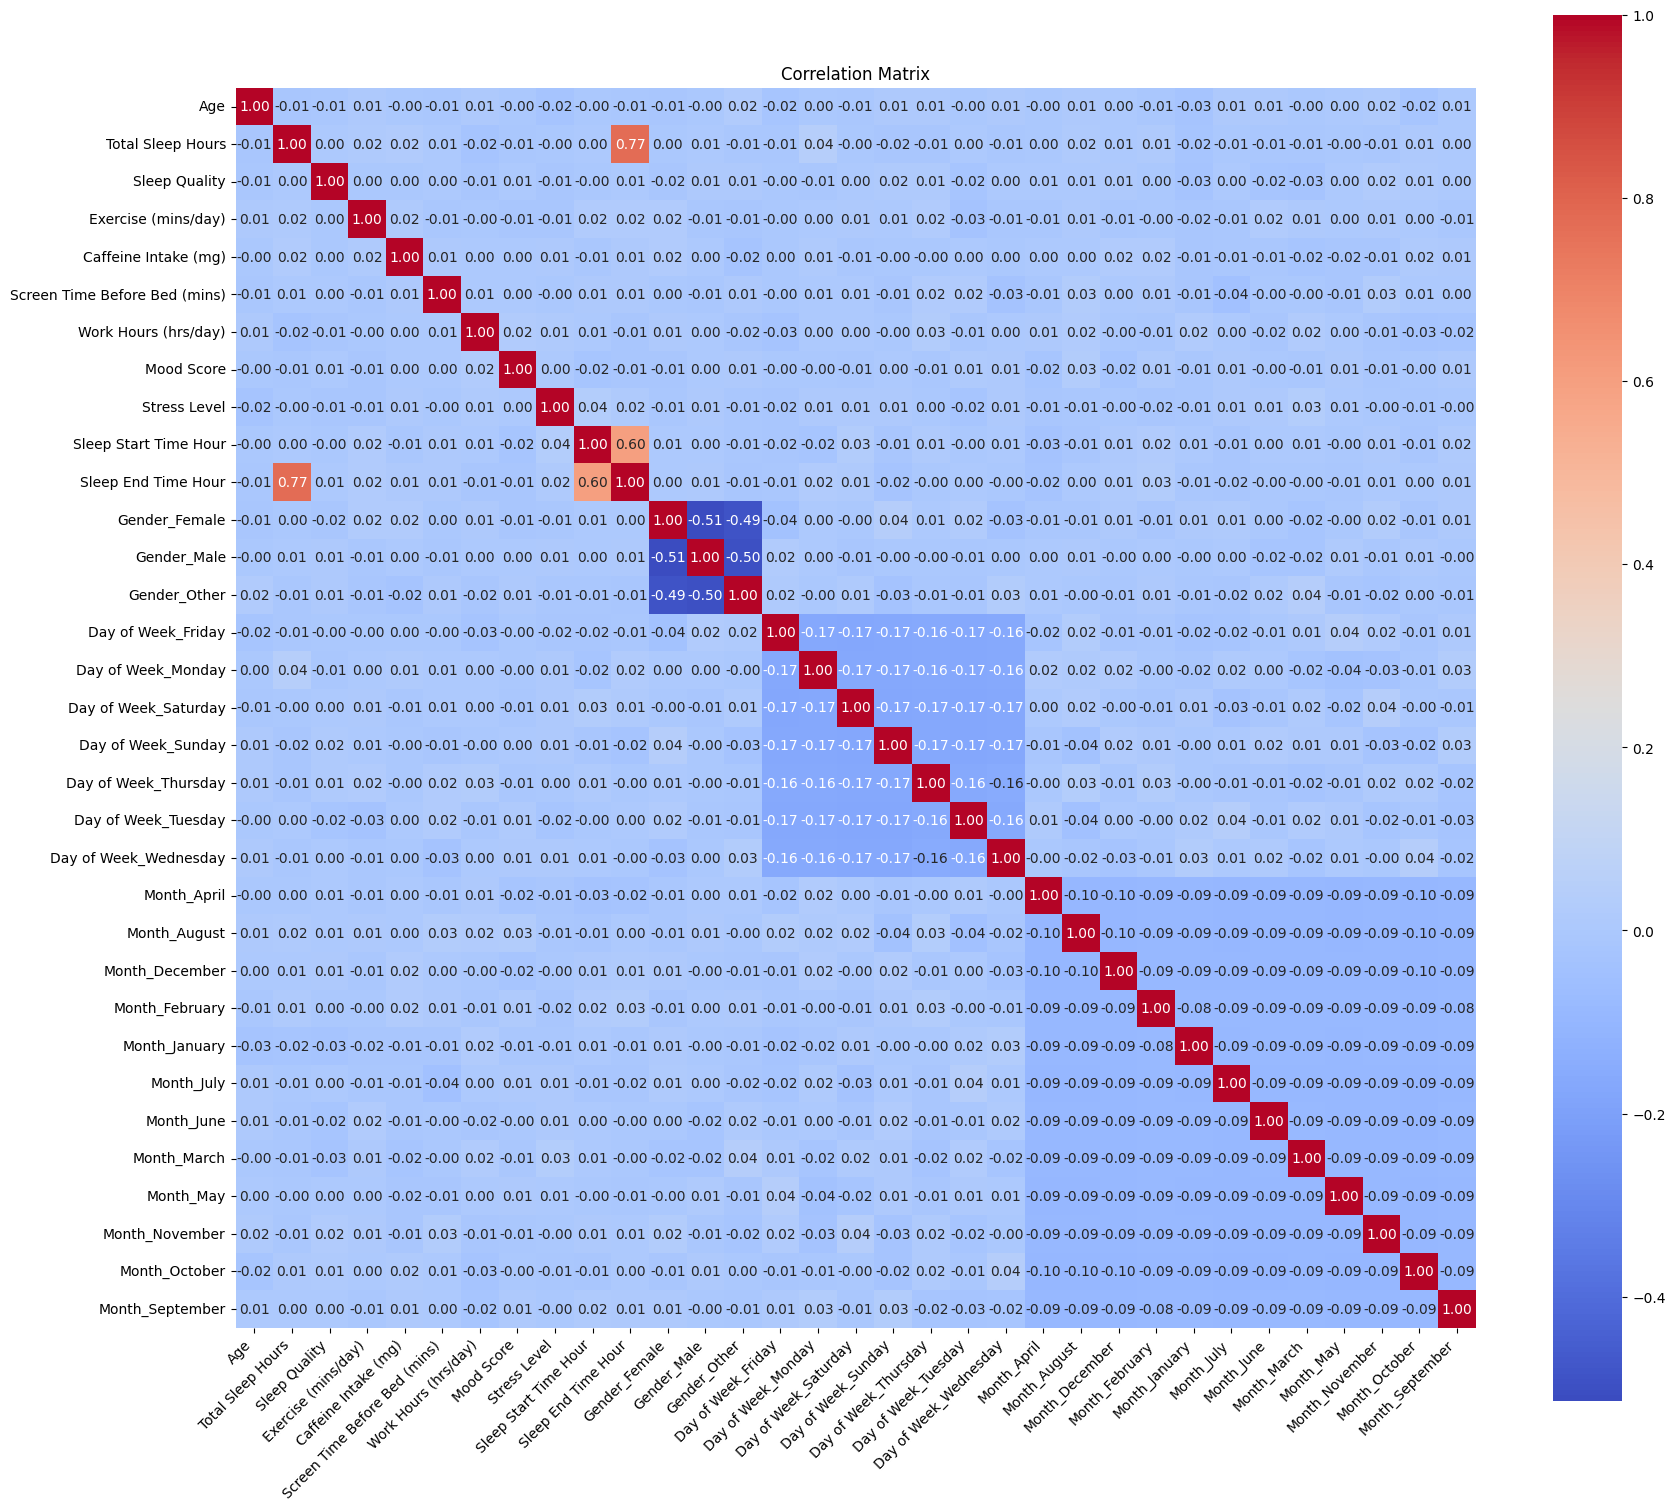

In [76]:
corr_matrix = X.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.discriminant_analysis import StandardScaler

num_features = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[num_features] = scaler.fit_transform(X_train_scaled[num_features])
X_test_scaled[num_features] = scaler.transform(X_test_scaled[num_features])

print("Training features shape:", X_train_scaled.shape)
print("Test features shape:", X_test_scaled.shape)

Training features shape: (4000, 33)
Test features shape: (1000, 33)


Note - no sampling is needed since the productivity score has a mostly balanced distribution from 1-10. Additionally, since this is a regression task, there's typically no sampling techniques needed

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 1.Baseline Elastic Net Regressor

In [80]:
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_grid = GridSearchCV(
    ElasticNet(max_iter=10000, random_state=42),
    param_grid=elastic_param_grid,
    cv=5,
    scoring=['neg_mean_squared_error', 'r2'],
    refit='r2',
    n_jobs=-1,
    verbose=1
)

elastic_grid.fit(X_train_scaled, y_train)
y_pred_en = elastic_grid.predict(X_test_scaled)

print("ElasticNet Best Params:", elastic_grid.best_params_)
print("ElasticNet MSE:", mean_squared_error(y_test, y_pred_en))
print("ElasticNet R²:", r2_score(y_test, y_pred_en))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
ElasticNet Best Params: {'alpha': 0.1, 'l1_ratio': 0.9}
ElasticNet MSE: 8.0866040625
ElasticNet R²: -0.0001954307742311201


## 2. Random Forest Regressor

In [81]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring=['neg_mean_squared_error', 'r2'],
    refit='r2',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)

print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest MSE: 8.258465762117504
Random Forest R²: -0.021452226006688946


## 3. XGBoost Regressor

In [82]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb_grid = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring=['neg_mean_squared_error', 'r2'],
    refit='r2',
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.predict(X_test)

print("XGBoost Best Params:", xgb_grid.best_params_)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBoost Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
XGBoost MSE: 8.087312698364258
XGBoost R²: -0.00028324127197265625


## Feature Importances

In [83]:
def plot_feature_importance(feature_names, importances, model_name, top_n=10):
  indices = np.argsort(importances)[-top_n:]
  plt.figure(figsize=(8, 6))
  plt.barh(range(len(indices)), np.array(importances)[indices], align='center')
  plt.yticks(range(len(indices)), np.array(feature_names)[indices])
  plt.xlabel('Importance')
  plt.title(f'{model_name} Feature Importance (Top {top_n})')
  plt.tight_layout()
  plt.show()

best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

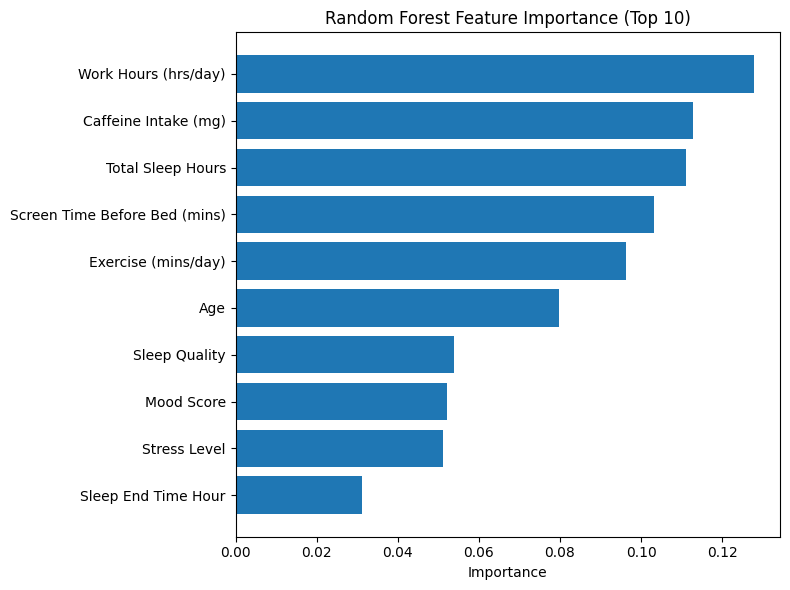

In [84]:
rf_importance = best_rf.feature_importances_
plot_feature_importance(X_train.columns, rf_importance, "Random Forest")

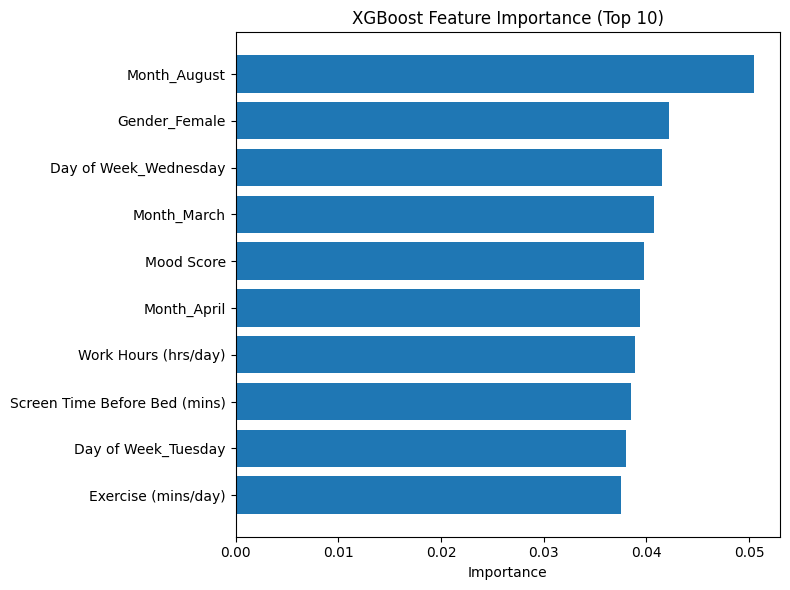

In [85]:
xgb_importance = best_xgb.feature_importances_
plot_feature_importance(X_train.columns, xgb_importance, "XGBoost")